In [1]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
import random
import cv2

In [2]:
IMG_SIZE = 64
TOTAL_IMG = 20
count = 0

In [3]:
def process_volume(image_volume,label_volume,save_path,volume):
    for i in range(256):
        current_image = image_volume[:,:,120]
        current_label = label_volume[:,:,120]
        
        if(np.sum(current_image) >2500):
            print("*"*50)
            plt.figure()
            plt.imshow(current_image)
            plt.figure()
            plt.imshow(current_label)
            
            generate_random_data(current_image,current_label,save_path,volume)
            
            break

def generate_multichannle_label(label):
    
    new_label = []
    for i in range(1,4):
        mask = np.zeros((IMG_SIZE,IMG_SIZE)) 
        mask[label == i] = 1
        new_label.append(mask)

    new_label = np.array(new_label)

    return new_label


def generate_random_data(image,label,save_path,volume):
    x_list= set(random.sample(range(0, 128-32), TOTAL_IMG))
    y_list= set(random.sample(range(0, 256-32), TOTAL_IMG))

    while(bool(x_list)):

        x = x_list.pop()
        y = y_list.pop()

    
        current_image_patch = image[y:y+IMG_SIZE,x:x+IMG_SIZE]
        temp = label[y:y+IMG_SIZE,x:x+IMG_SIZE]
        
#         print("*"*50)
#         plt.figure()
#         plt.imshow(current_image_patch)
#         plt.figure()
#         plt.imshow(current_label_patch)

        

        if(np.sum(current_image_patch)>800):
            current_label_patch = generate_multichannle_label(temp)
            plt.figure()
            plt.imshow(current_image_patch)
            plt.figure()
            plt.imshow(temp)
            print("*********************************")
            plt.figure()
            plt.imshow(current_label_patch[0])
            
            plt.figure()
            plt.imshow(current_label_patch[1])
            
            plt.figure()
            plt.imshow(current_label_patch[2])
            

        
            break



In [4]:
image_volume = scipy.io.loadmat("../../data/raw_data/training/Vol_01_input.mat")
label_volume = scipy.io.loadmat("../../data/raw_data/training/Vol_01gt.mat")

In [5]:
save_path = "../../data/training/train/"
volume = "vol_01"

In [6]:
image_volume = image_volume["ana"]
label_volume = label_volume["gt"]


In [7]:
print(image_volume.shape)
print(label_volume.shape)

(256, 128, 256)
(256, 128, 256)


**************************************************
*********************************


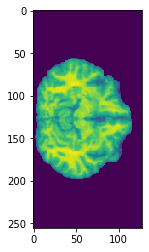

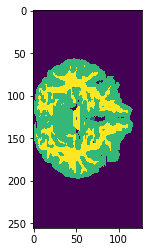

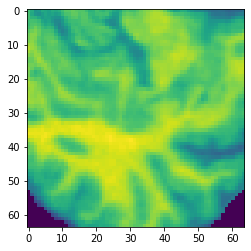

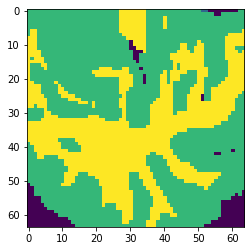

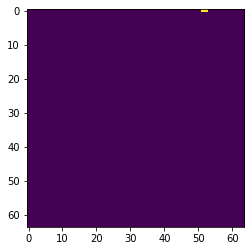

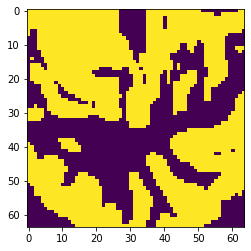

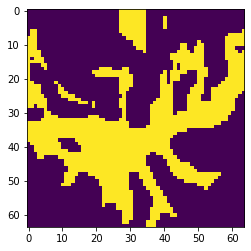

In [8]:
process_volume(image_volume,label_volume,save_path,volume)

In [17]:
image = cv2.imread("image.png",0)
label = cv2.imread("label.png",0)


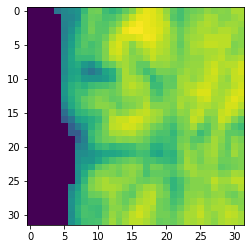

In [18]:
plt.imshow(image)

In [19]:
print(np.unique(image))
print(np.unique(label))

[  0  32  33  35  39  42  43  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]
[0 2 3]


In [20]:
image = (image - np.mean(image))/np.std(image)


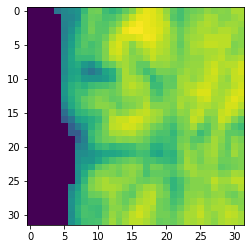

In [21]:
plt.imshow(image)

In [22]:
image

array([[-2.02439417, -2.02439417, -2.02439417, ...,  0.54236594,
         0.71737231,  0.71737231],
       [-2.02439417, -2.02439417, -2.02439417, ...,  0.54236594,
         0.62986912,  0.68820458],
       [-2.02439417, -2.02439417, -2.02439417, ...,  0.65903685,
         0.65903685,  0.62986912],
       ...,
       [-2.02439417, -2.02439417, -2.02439417, ...,  0.77570776,
         0.74654003,  0.57153366],
       [-2.02439417, -2.02439417, -2.02439417, ...,  0.83404322,
         0.80487549,  0.68820458],
       [-2.02439417, -2.02439417, -2.02439417, ...,  0.77570776,
         0.74654003,  0.68820458]])